In [4]:
import tensorflow as tf
from matplotlib import pyplot
%matplotlib inline
import numpy as np

from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# import warnings
# warnings.filterwarnings('ignore')

In [5]:
(trainX, trainY), (testX, testY)= fashion_mnist.load_data()
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


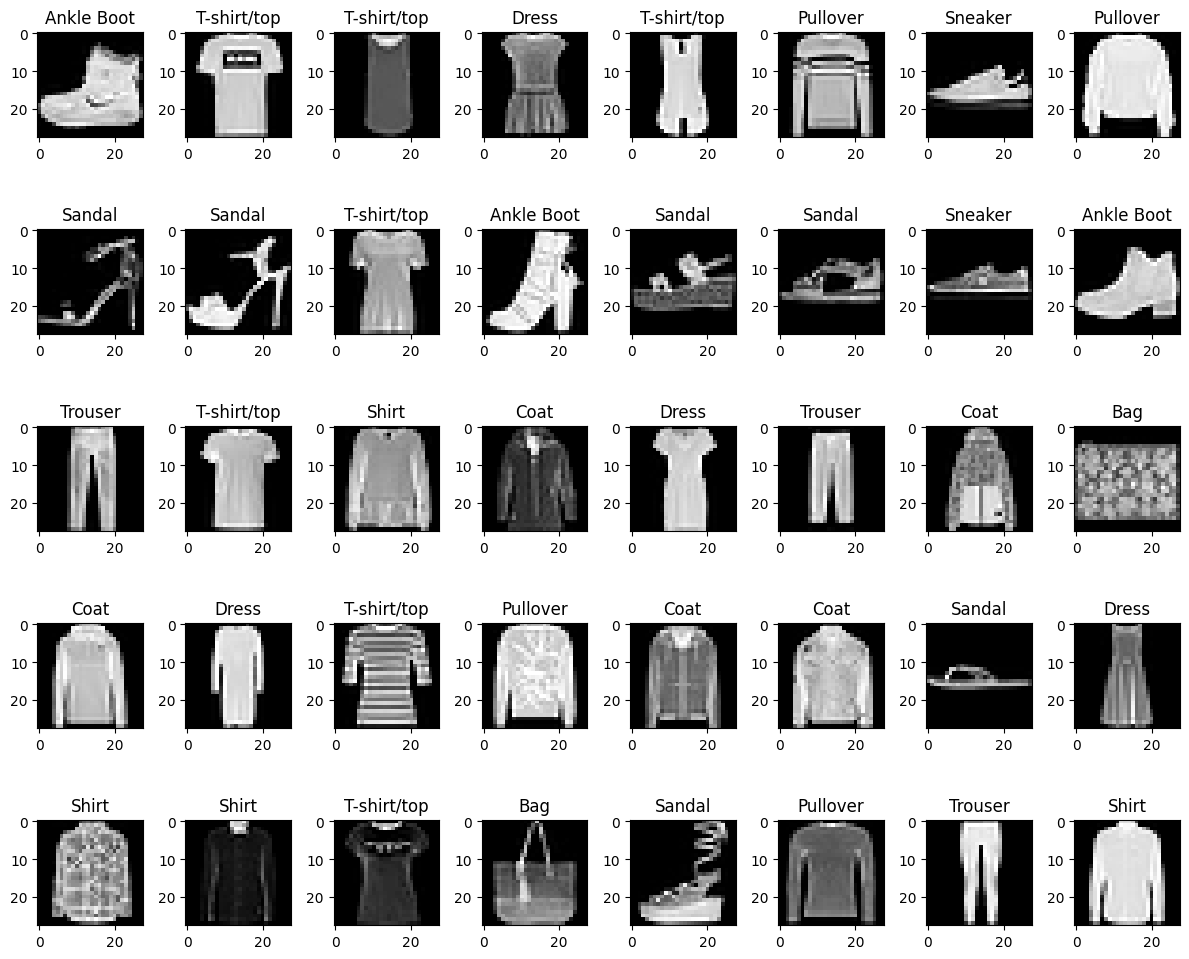

In [6]:
def plot_sample_images(trainX, trainY):
    Rename_labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
    num_row = 5
    num_col = 8
    num = num_row * num_col
    sample_images = trainX[:num]
    sample_labels = trainY[:num]
    
    Rename_sample_labels = []
    
    #Rename the labels
    for i in range(len(sample_labels)):
        res = np.nonzero(sample_labels[i])[0]
        Rename_sample_labels.append(Rename_labels[res[0]])
    

    #plot images
    fig, axes = pyplot.subplots(num_row, num_col, figsize=(1.5*num_col, 2* num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col] #floored quotient of x and y, remainder of x / y
        ax.imshow(sample_images[i], cmap='gray')
        ax.set_title(Rename_sample_labels[i])
    pyplot.tight_layout()
    pyplot.savefig("Fashion_Sample")
    pyplot.show()
    

plot_sample_images(trainX, trainY)

In [7]:
# scale pixels
def prep_pixels(train, test): 
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# prepare pixel data

trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

trainX, testX = prep_pixels(trainX, testX)

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)
print(trainX.shape)
print(valX.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [8]:
#define cnn model
# this cnn architecture refers to the paper: Kadam, Shivam S., Amol C. Adamuthe, and Ashwini B. Patil. 
# "CNN model for image classification on MNIST and fashion-MNIST dataset." Journal of scientific research 64, no. 2 (2020): 374-384.
model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-07-05 15:46:17.965313: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-05 15:46:17.966438: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-05 15:46:17.990588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:68:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-07-05 15:46:17.990610: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-05 15:46:18.021366: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-05 15:46:18.021426: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

In [9]:
early = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("fashionmnist_model.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')
history = model.fit(trainX, trainY, epochs=50, validation_data=(valX, valY), callbacks=[checkpoint, early], batch_size=32, verbose=1)

2023-07-05 15:46:29.722196: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-05 15:46:29.736757: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3700000000 Hz


Epoch 1/50


2023-07-05 15:46:30.094654: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-07-05 15:46:30.409304: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-07-05 15:46:31.421668: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-07-05 15:46:31.443358: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1500/1500 [==============================] - 5s 1ms/step - loss: 0.8162 - accuracy: 0.6995 - val_loss: 0.3840 - val_accuracy: 0.8610

Epoch 00001: val_accuracy improved from -inf to 0.86100, saving model to fashionmnist_model.h5
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4074 - accuracy: 0.8507 - val_loss: 0.3300 - val_accuracy: 0.8757

Epoch 00002: val_accuracy improved from 0.86100 to 0.87567, saving model to fashionmnist_model.h5
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3416 - accuracy: 0.8755 - val_loss: 0.2974 - val_accuracy: 0.8916

Epoch 00003: val_accuracy improved from 0.87567 to 0.89158, saving model to fashionmnist_model.h5
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3069 - accuracy: 0.8885 - val_loss: 0.2843 - val_accuracy: 0.8970

Epoch 00004: val_accuracy improved from 0.89158 to 0.89700, saving model to fashionmnist_model.h5
Epoch 5/50
1500/1500 [====================

In [10]:
_, acc = model.evaluate(testX, testY, verbose=0)
print("test:",acc)
_, acc = model.evaluate(trainX, trainY, verbose=0)
print("train:",acc)
_,acc = model.evaluate(valX, valY, verbose=0)
print("val",acc)


test: 0.9200999736785889
train: 0.9753333330154419
val 0.922166645526886


In [11]:
model.save("fashionmnist_model.h5")

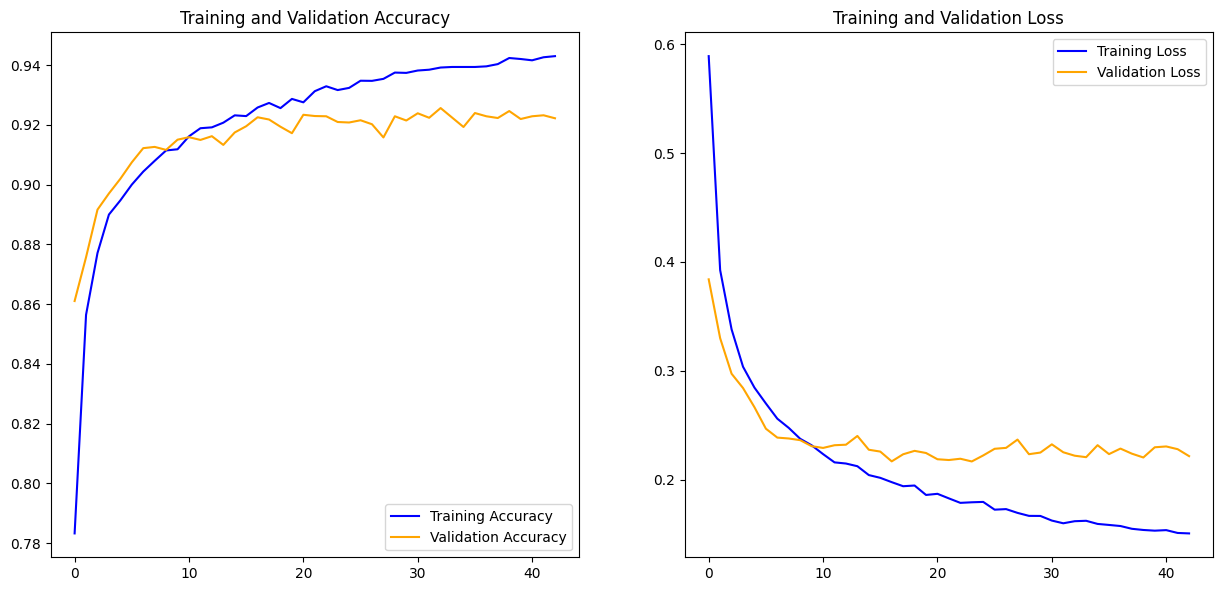

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


pyplot.figure(figsize=(15, 15))
pyplot.subplot(2, 2, 1)
pyplot.plot(acc, color="blue", label='Training Accuracy')
pyplot.plot(val_acc, color="orange", label='Validation Accuracy')
pyplot.legend(loc='lower right')
pyplot.title('Training and Validation Accuracy')

pyplot.subplot(2, 2, 2)
pyplot.plot(loss, color="blue", label='Training Loss')
pyplot.plot(val_loss, color="orange", label='Validation Loss')
pyplot.legend(loc='upper right')
pyplot.title('Training and Validation Loss')
pyplot.savefig('FashionMnist_3layers_50epochs.png')
pyplot.show()

In [13]:
model1 = load_model("fashionmnist_model.h5")
model1_last_layer_output = Model(inputs=model1.input, outputs=model1.layers[-2].output)
model1_last_layer_output_train = model1_last_layer_output.predict(trainX, batch_size=32)
model1_last_layer_output_val = model1_last_layer_output.predict(valX, batch_size=32)
model1_last_layer_output_test = model1_last_layer_output.predict(testX, batch_size=32)


model2 = Sequential()
# model2.add(Dense(128,activation="relu"))
model2.add(Dense(10, activation='softmax'))
    # compile model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("fashionmnist_model2.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

model2.fit(model1_last_layer_output_train, trainY, epochs=50, validation_data=(model1_last_layer_output_val, valY),callbacks=[checkpoint, early], batch_size=32)


_,acc = model2.evaluate(model1_last_layer_output_test, testY, verbose=0)
print("test:",acc)
_, acc = model2.evaluate(model1_last_layer_output_train, trainY, verbose=0)
print("train:",acc)
_,acc = model2.evaluate(model1_last_layer_output_val, valY, verbose=0)
print("val:",acc)


del model1_last_layer_output_train
del model1_last_layer_output_val
del model1_last_layer_output_test
del model1, model2
tf.keras.backend.clear_session()

Epoch 1/50
1500/1500 [==============================] - 1s 678us/step - loss: 1.7751 - accuracy: 0.6847 - val_loss: 0.2667 - val_accuracy: 0.9171

Epoch 00001: val_accuracy improved from -inf to 0.91708, saving model to fashionmnist_model2.h5
Epoch 2/50
1500/1500 [==============================] - 1s 640us/step - loss: 0.0979 - accuracy: 0.9666 - val_loss: 0.2515 - val_accuracy: 0.9219

Epoch 00002: val_accuracy improved from 0.91708 to 0.92192, saving model to fashionmnist_model2.h5
Epoch 3/50
1500/1500 [==============================] - 1s 635us/step - loss: 0.0745 - accuracy: 0.9741 - val_loss: 0.2547 - val_accuracy: 0.9233

Epoch 00003: val_accuracy improved from 0.92192 to 0.92325, saving model to fashionmnist_model2.h5
Epoch 4/50
1500/1500 [==============================] - 1s 635us/step - loss: 0.0678 - accuracy: 0.9750 - val_loss: 0.2615 - val_accuracy: 0.9241

Epoch 00004: val_accuracy improved from 0.92325 to 0.92408, saving model to fashionmnist_model2.h5
Epoch 5/50
1500/150

In [10]:
model1 = load_model("fashionmnist_model.h5")
model1_last_layer_output = Model(inputs=model1.input, outputs=model1.layers[-2].output)
model1_last_layer_output_train = model1_last_layer_output.predict(trainX, batch_size=32)
model1_last_layer_output_val = model1_last_layer_output.predict(valX, batch_size=32)
model1_last_layer_output_test = model1_last_layer_output.predict(testX, batch_size=32)


model2 = Sequential()
#model2.add(Dense(128,activation="relu"))
model2.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("fashionmnist_model3.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

model2.fit(model1_last_layer_output_train, trainY, epochs=50, validation_data=(model1_last_layer_output_val, valY), callbacks=[checkpoint, early], batch_size=32)


_,acc = model2.evaluate(model1_last_layer_output_test, testY, verbose=0)
print("test:",acc)
_, acc = model2.evaluate(model1_last_layer_output_train, trainY, verbose=0)
print("train:",acc)
_,acc = model2.evaluate(model1_last_layer_output_val, valY, verbose=0)
print("val:",acc)

del model1_last_layer_output
del model1_last_layer_output_train
del model1_last_layer_output_val
del model1_last_layer_output_test
del model1
tf.keras.backend.clear_session()

Epoch 1/50
1500/1500 [==============================] - 1s 656us/step - loss: 0.5097 - accuracy: 0.8762 - val_loss: 0.2580 - val_accuracy: 0.9168

Epoch 00001: val_accuracy improved from -inf to 0.91675, saving model to fashionmnist_model3.h5
Epoch 2/50
1500/1500 [==============================] - 1s 628us/step - loss: 0.1009 - accuracy: 0.9632 - val_loss: 0.2470 - val_accuracy: 0.9203

Epoch 00002: val_accuracy improved from 0.91675 to 0.92033, saving model to fashionmnist_model3.h5
Epoch 3/50
1500/1500 [==============================] - 1s 620us/step - loss: 0.0852 - accuracy: 0.9691 - val_loss: 0.2465 - val_accuracy: 0.9223

Epoch 00003: val_accuracy improved from 0.92033 to 0.92233, saving model to fashionmnist_model3.h5
Epoch 4/50
1500/1500 [==============================] - 1s 618us/step - loss: 0.0830 - accuracy: 0.9697 - val_loss: 0.2462 - val_accuracy: 0.9219

Epoch 00004: val_accuracy did not improve from 0.92233
Epoch 5/50
1500/1500 [==============================] - 1s 624u